<a href="https://colab.research.google.com/github/Lzamudio02/DataScience/blob/main/ising_model_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 3. 2D Ising model
## from Matlab code BM Friedrich, 09.11.2022

RENAME THIS FILE AND SAVE AS YOUR OWN PRIVATE COPY ON YOUR GOOGLE DISC!
OR DOWNLOAD THE NOTEBOOK.

The simulations take HOURS to run.
You can download the .csv file from colab folder with results for tests or copy tables from Matlab script.

PLEASE, DON'T CHANGE THIS FILE.

In [ ]:
arr = np.array()

1
2
3
4
5
6
7
8
9
10


In [ ]:
# import standard libraries
import numpy as np # for arrays and fast calculations
import matplotlib.pyplot as plt # for plots
from tqdm.notebook import tqdm # to track how long a function runs
import pandas as pd # for work with tables, popular in data analysis
import math # for mathematical functions

## Parameters

In [ ]:
# systematic biases
# finite system size (nspin)
# finite relaxation time (nt)
# stochastic realizations (nsim)

In [ ]:
nspin = 2**4 # square lattice of spins of dimensions nspin x nspin (with periodic boundary conditions)

In [ ]:
J0 = 1 # [J] spin interaction energy: E=-J0 for spin1=spin2, E=+J0 for spin1=-spin2

In [ ]:
beta = 0.5 # [1/J] inverse temperature

In [ ]:
beta_list = np.concatenate((np.linspace(0, 0.4, 5), np.linspace(0.42, 0.5, 5), np.linspace(0.6, 1, 5) ))

In [ ]:
beta_crit = math.log(1+math.sqrt(2))/(2*J0) # [1/J] Onsager's analytical result for the critical temperature

In [ ]:
nt = int(1e5) # number of Monte-Carlo steps

## Metropolis Monte-Carlo

In [ ]:
def get_E(spins):
    return -J0 * np.sum(spins * np.roll(spins, +1, axis=0) + spins * np.roll(spins, +1, axis=1))

In [ ]:
n = 5
spins = (np.random.rand(n,n)>0.5) * 1
spins = np.where(spins, 0, -1)

print( get_E(spins) )

-9


In [ ]:
def deltaE(spins, ispin):
    ir, ic = ispin
    Eold = get_E(spins)
    spins[ir, ic] = -spins[ir, ic]
    E = get_E(spins)
    return E - Eold

In [ ]:
def flip_one(spins, ispin, p):
    ir, ic = ispin
    if np.random.uniform(0, 1, 1)[0] > p:
        spins[ir, ic] = -spins[ir, ic]
    return spins

In [ ]:
def monte_carlo(nt, J0, beta):

    spins = np.where(np.random.uniform(0, 1, [nspin, nspin]) > 0.5, -1, 1) # random initial spin configuration
    E_list = [] # energies of spin configurations
    Phi_list = [] # mean magnetization of spin configurations
    E = get_E(spins)

    for it in tqdm( range(1, nt) ):
        # Monte-Carlo step
        ispin = np.random.randint(nspin, size=2) # select random spin
        dE = deltaE(spins, ispin)
        p = np.exp(-beta*dE)
        spins = flip_one(spins, ispin, p)

        E_list.append(get_E(spins))
        Phi_list.append(np.mean(spins))

    return E_list, Phi_list

In [ ]:
E_list, Phi_list = monte_carlo(int(1e2), J0, beta)

  0%|          | 0/99 [00:00<?, ?it/s]

In [ ]:
def beta_loop(beta_list):
    E_mean_list = []
    Phi_mean_list = []
    for beta in beta_list:
        E_list, Phi_list = monte_carlo(nt, J0, beta)
        E_mean_list.append(np.mean(E_list))
        Phi_mean_list.append(np.mean(Phi_list))
    return np.array(E_mean_list), np.array(Phi_mean_list)

In [ ]:
# Takes HOURS to run!
# For tests decrease the number of time steps
# Save intermediate results - you can think about saving E_mean_list and Phi_mean_list for each beta (in function beta_loop can be added np.savetxt)
E_mean_list, Phi_mean_list = beta_loop(beta_list)

  0%|          | 0/99999 [00:00<?, ?it/s]

  0%|          | 0/99999 [00:00<?, ?it/s]

  0%|          | 0/99999 [00:00<?, ?it/s]

  0%|          | 0/99999 [00:00<?, ?it/s]

  0%|          | 0/99999 [00:00<?, ?it/s]

  0%|          | 0/99999 [00:00<?, ?it/s]

  0%|          | 0/99999 [00:00<?, ?it/s]

  0%|          | 0/99999 [00:00<?, ?it/s]

  0%|          | 0/99999 [00:00<?, ?it/s]

  0%|          | 0/99999 [00:00<?, ?it/s]

  0%|          | 0/99999 [00:00<?, ?it/s]

  0%|          | 0/99999 [00:00<?, ?it/s]

  0%|          | 0/99999 [00:00<?, ?it/s]

  0%|          | 0/99999 [00:00<?, ?it/s]

  0%|          | 0/99999 [00:00<?, ?it/s]

## Make plots

## $ \langle \frac{E}{J_{0}} \rangle$

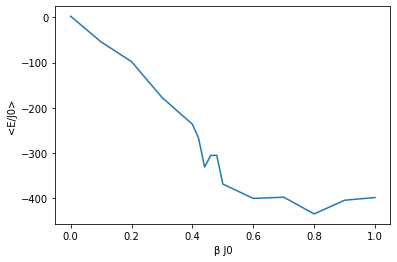

In [ ]:
plt.plot(beta_list, E_mean_list)
plt.xlabel('\u03B2 J0')
plt.ylabel('<E/J0>')
plt.show()

## $ \langle \Phi \rangle $

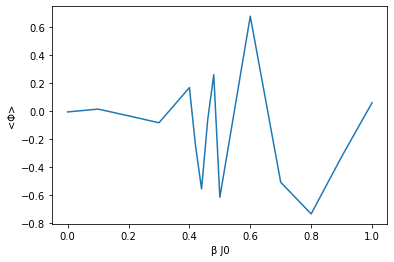

In [ ]:
plt.plot(beta_list, Phi_mean_list)
plt.xlabel('\u03B2 J0')
plt.ylabel('<\u03A6>')
plt.show()

# Save results to .csv table

In [ ]:
obtained_E_Phi = pd.DataFrame( np.vstack((beta_list, E_mean_list, Phi_mean_list)).T, columns = ['beta','E_mean','Phi_mean'])

In [ ]:
obtained_E_Phi

,beta,E_mean,Phi_mean
0,0.00,2.652265,-0.006287
1,0.10,-54.187419,0.013905
2,0.20,-97.752175,-0.034125
3,0.30,-176.974897,-0.083456
4,0.40,-236.303630,0.166946
5,0.42,-266.520652,-0.246501
6,0.44,-330.867087,-0.554849
7,0.46,-305.223322,-0.064087
8,0.48,-304.961296,0.258955
9,0.50,-368.610861,-0.613826


In [ ]:
obtained_E_Phi.to_csv("obtained_E_Phi.csv")